<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Fraud_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to predict whether a transaction is a valid transaction or a fraudulent transaction using the random forest classifier.

In [1]:
# Import required software libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Load the data on Google Colab 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving creditcard.csv to creditcard.csv


In [3]:
# Import the data set into a dataframe.
credit_data = pd.read_csv('creditcard.csv')

The credit card dataset contains real bank transactions from European credit  card holders in the year 2013. For security purposes, the actual variable names are not included and are labeled V followed by a number with the exception of amount and class. There are 30 feature columns and 1 target column named class.

In [4]:
# Print the first 5 rows.
credit_data.head()  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Show information about the data columns.
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are 284,807 transactions with 31 variables. Credit transactions do not have any missing values and all columns contain numerical variables.  

In [6]:
# Show class types and counts for each type. 
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Fraudulent transactions: 0.17%

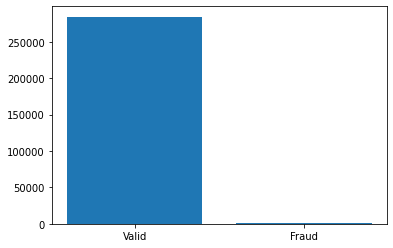

In [8]:
# Visualize valid and fraudulent transactions and show the percentage of fraud.
plt.bar(['Valid','Fraud'],list(credit_data['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= credit_data['Class'].value_counts()[1]/sum(credit_data['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

We have a highly unbalanced dataset. The majority of transactions are clearly valid with few cases of fraud. 

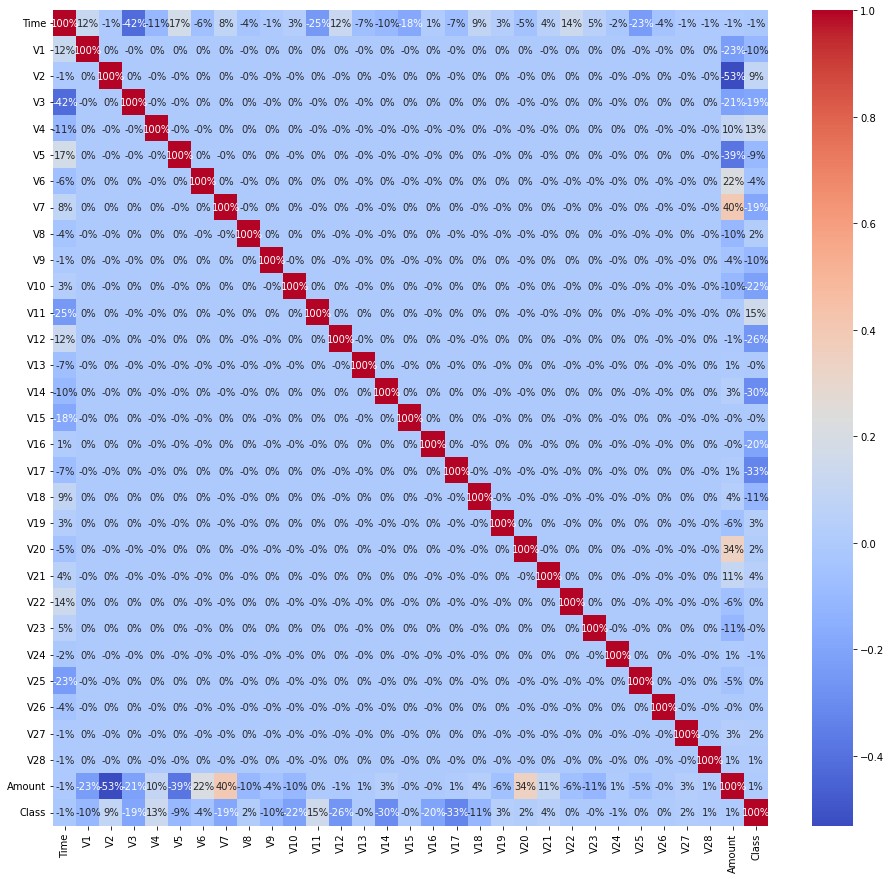

In [9]:
# Visualize the correlations between variables in a heat map.
plt.figure(figsize=(16,15))  
sns.heatmap(credit_data.corr(), annot=True, fmt='.0%', cmap='coolwarm')

There are no high correlation values among the predictor columns. No predictor column has a high correlation value with the Class column. However, there exists a negative correlation among V2 and Amount as well as a positive correlation among V7 and the Amount feature. 

**Data Cleaning**

In [10]:
# Check the amount column for variances in the values.
min(credit_data.Amount), max(credit_data.Amount)

(0.0, 25691.16)

In [11]:
# Scale the amount variable using standard scaler to correct for wide variances in the amounts. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = credit_data['Amount'].values
credit_data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [12]:
# Remove the time variable as it has limited value.
credit_data.drop(['Time'], axis=1, inplace=True)

**Split the Data into Training and Test Data Sets**

In [13]:
# Specify the features data (x) and the target data (y) from the data set. 
# x data will be all of the data columns except for the Class.
# y data will be only the Class column.
x = credit_data.drop('Class', axis = 1)
y = credit_data['Class']

In [14]:
# Use train_test_split function to generate training data and test data. Test data set will be 20% of the original data set.  
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.2)

**We will now train models, make predictions and evaluate the performance of four different machine learning models.**

**Random Forrest Model**

In [15]:
# Create model object. 
model_rf = RandomForestClassifier()
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [16]:
# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(f'Accuracy: {round(rf*100,2)}%')

Accuracy: 99.95%


In [17]:
# Evaluate the performance of the model.  
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.78      0.85       100

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



The random forrest model accurately predicted over 99% of the transactions as being valid or fraud.  

*   100% correctly predicted valid transactions.  
*   94% correctly predicted fraud transactions. 

**Logistic Regression Model**

In [18]:
# Create model object. 
model_lr = LogisticRegression(max_iter=150)
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)

In [19]:
# Calculate the Accuracy Score.
lr = accuracy_score(y_test_data, predictions_lr)
print(f'Accuracy: {round(lr*100,2)}%')

Accuracy: 99.92%


In [20]:
# Evaluate the performance of the model.  
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.91      0.63      0.75       100

    accuracy                           1.00     56962
   macro avg       0.96      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



The logical regression model accurately predicted 99.92% of the transactions as being valid or fraud.  

*   100% correctly predicted valid transactions.  
*   91% correctly predicted fraud transactions. 

**Support Vector Machine Model**

In [21]:
# Create model object. 
model_sv = SVC()
# Train the model on the training data.
model_sv.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_sv = model_sv.predict(x_test_data)

In [22]:
# Calculate the Accuracy Score.
sv = accuracy_score(y_test_data, predictions_sv)
print(f'Accuracy: {round(sv*100,2)}%')

Accuracy: 99.93%


In [23]:
# Evaluate the performance of the model.  
print(classification_report(y_test_data, predictions_sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.67      0.78       100

    accuracy                           1.00     56962
   macro avg       0.96      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962



The support vector machine model accurately predicted 99.93% of the transactions as being valid or fraud.  

*   100% correctly predicted valid transactions.  
*   93% correctly predicted fraud transactions. 

**K Nearest Neighbors**

In [24]:
# Create model object. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20) # (n_neighbors = 5, metric = 'minkowski', p = 2) 
# Train the model on the training data.
model_kn.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [25]:
# Calculate the Accuracy Score.
kn = accuracy_score(y_test_data, predictions_kn)
print(f'Accuracy: {round(kn*100,2)}%')

Accuracy: 99.94%


In [26]:
# Evaluate the performance of the model.  
print(classification_report(y_test_data, predictions_kn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.91      0.75      0.82       100

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



The k nearest neighbors model accurately predicted 99.94% of the transactions as being valid or fraud.  

*   100% correctly predicted valid transactions.  
*   91% correctly predicted fraud transactions. 

,Model,Accuracy_score
0,Random Forrest,0.999526
3,K Nearest Neighbors,0.999438
2,Support Vector Machine,0.999333
1,Logistic Regression,0.999245


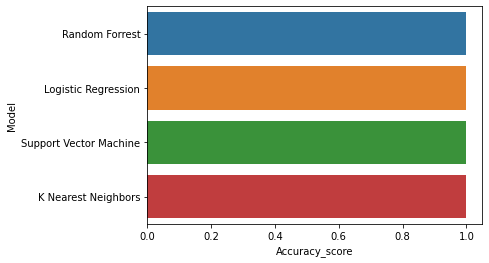

In [27]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Random Forrest', 'Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbors'],
    'Accuracy_score' :[rf, lr, sv, kn]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)


Conclusions:                                                                  All of the models did an excellent job in predicting valid and fradulent transactions with accuracy scores above 99%. The random forrest model had the highest accuracy score. This model correctly predicted 99.95% of transactions as being valid or fraudulent.  The data was heavily weighted towards valid transactions. The study can be improved by having a more balanced dataset between valid and fraudulent transactions.        